---
author:
- 'Adrian E. Feiguin'
title: 'Computational Physics'
...

Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_0=83^{\circ} C$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [5]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [6]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    print i,i*dt, T
    # we can also do t = t - r*(t-ts)*dt
    

1 0.05 10.365
2 0.1 10.728175
3 0.15 11.089534125
4 0.2 11.4490864544
5 0.25 11.8068410221
6 0.3 12.162806817
7 0.35 12.5169927829
8 0.4 12.869407819
9 0.45 13.2200607799
10 0.5 13.568960476
11 0.55 13.9161156736
12 0.6 14.2615350953
13 0.65 14.6052274198
14 0.7 14.9472012827
15 0.75 15.2874652763
16 0.8 15.6260279499
17 0.85 15.9628978101
18 0.9 16.2980833211
19 0.95 16.6315929045
20 1.0 16.96343494
21 1.05 17.2936177653
22 1.1 17.6221496764
23 1.15 17.949038928
24 1.2 18.2742937334
25 1.25 18.5979222647
26 1.3 18.9199326534
27 1.35 19.2403329901
28 1.4 19.5591313252
29 1.45 19.8763356686
30 1.5 20.1919539902
31 1.55 20.5059942203
32 1.6 20.8184642492
33 1.65 21.1293719279
34 1.7 21.4387250683
35 1.75 21.7465314429
36 1.8 22.0527987857
37 1.85 22.3575347918
38 1.9 22.6607471178
39 1.95 22.9624433823
40 2.0 23.2626311653
41 2.05 23.5613180095
42 2.1 23.8585114195
43 2.15 24.1542188624
44 2.2 24.4484477681
45 2.25 24.7412055292
46 2.3 25.0324995016
47 2.35 25.3223370041
48 2.4 25.610725

377 18.85 71.9687608157
378 18.9 72.0239170116
379 18.95 72.0787974266
380 19.0 72.1334034394
381 19.05 72.1877364222
382 19.1 72.2417977401
383 19.15 72.2955887514
384 19.2 72.3491108077
385 19.25 72.4023652536
386 19.3 72.4553534274
387 19.35 72.5080766602
388 19.4 72.5605362769
389 19.45 72.6127335955
390 19.5 72.6646699276
391 19.55 72.7163465779
392 19.6 72.767764845
393 19.65 72.8189260208
394 19.7 72.8698313907
395 19.75 72.9204822338
396 19.8 72.9708798226
397 19.85 73.0210254235
398 19.9 73.0709202964
399 19.95 73.1205656949
400 20.0 73.1699628664
401 20.05 73.2191130521
402 20.1 73.2680174868
403 20.15 73.3166773994
404 20.2 73.3650940124
405 20.25 73.4132685423
406 20.3 73.4612021996
407 20.35 73.5088961886
408 20.4 73.5563517077
409 20.45 73.6035699491
410 20.5 73.6505520994
411 20.55 73.6972993389
412 20.6 73.7438128422
413 20.65 73.790093778
414 20.7 73.8361433091
415 20.75 73.8819625925
416 20.8 73.9275527796
417 20.85 73.9729150157
418 20.9 74.0180504406
419 20.95 74.06

Let's try plotting the results. We first need to import the required libraries and methods

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [8]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [9]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

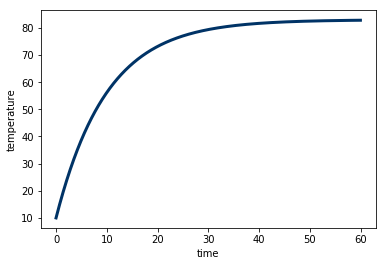

In [10]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [11]:
my_time = np.linspace(0.,tmax,nsteps)

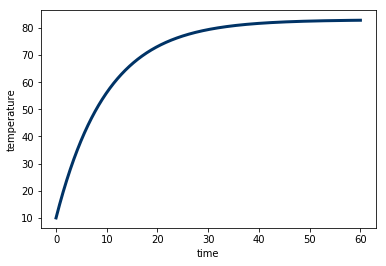

In [12]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [13]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [14]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [15]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence:

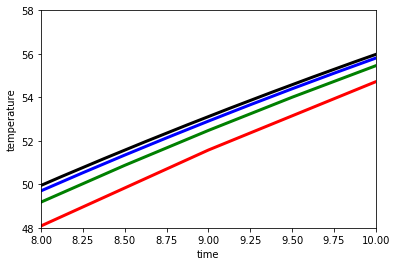

In [16]:
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/2.

pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10);
pyplot.ylim(48,58);

### Challenge 1.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 